# Apply Several Preprocessing Method to Modeling at once part 1a : Ridge

Data : tips
<br>Target : tip
<br>Preprocess : 
- One hot preprocessing : sex,smoker,time
- Binary encoding : day
- Robust scaler : total_bill
- no treatment : size
<br>
<br>
Random state 10, data splitting 70:30 model Ridge default

In [1]:
# pip install category_encoders untuk install binary encoding

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler, OneHotEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer 

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [3]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Preprocessing

### Encoding

In [4]:
onehot = OneHotEncoder() # k dummy : tree, random forest, boosting, knn
onehot = OneHotEncoder(drop='first') # linear model : regresi, regresi logistik k-1\

transformer = ColumnTransformer([
    ('onehot',onehot,['sex','smoker','time'])
])
# pd.DataFrame(onehot.fit_transform(df[['sex','smoker']]))

In [5]:
onehot_enc = pd.DataFrame(transformer.fit_transform(df))
onehot_enc

,0,1,2
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
239,1.0,0.0,0.0
240,0.0,1.0,0.0
241,1.0,1.0,0.0
242,1.0,0.0,0.0


In [6]:

onehot_enc.columns = transformer.get_feature_names()
onehot_enc

,onehot__x0_Male,onehot__x1_Yes,onehot__x2_Lunch
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
239,1.0,0.0,0.0
240,0.0,1.0,0.0
241,1.0,1.0,0.0
242,1.0,0.0,0.0


### Binary Encoder

In [7]:
binary = ce.BinaryEncoder()

transformer = ColumnTransformer([
    ('binaryEncoding',binary,['day'])
])

In [8]:
binary_enc = pd.DataFrame(transformer.fit_transform(df))
binary_enc.columns = transformer.get_feature_names()
binary_enc

C:\Users\62812\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,binaryEncoding__day_0,binaryEncoding__day_1,binaryEncoding__day_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
239,0,1,0
240,0,1,0
241,0,1,0
242,0,1,0


### Robust Scaler

In [9]:
robust = RobustScaler()
transformer = ColumnTransformer([
    ('robust',robust,['total_bill'])
])

In [10]:
# robust_enc = pd.DataFrame(transformer.fit_transform(df))
# transformer.get_feature_names()

## Preprocessing Scheme

In [11]:
transformer = ColumnTransformer([
    ('onehot',onehot,['sex','smoker','time']),
    ('binary',binary,['day']),
    ('robust',robust,['total_bill'])
],remainder = 'passthrough' )


In [12]:
# df_enc = pd.DataFrame(transformer.fit_transform(df))
# df_enc.columns = transformer.get_feature_names()
# df_enc

## Data Splitting

In [13]:
# split data
x = df.drop(columns=['tip'])
y = df['tip']

x_train,x_test,y_train,y_test = train_test_split(
    x,
    y,
    test_size = 0.3,
#     random_state = 1899
)

## Preprocess Fitting

In [14]:
x_train

,total_bill,sex,smoker,day,time,size
29,19.65,Female,No,Sat,Dinner,2
13,18.43,Male,No,Sun,Dinner,4
59,48.27,Male,No,Sat,Dinner,4
10,10.27,Male,No,Sun,Dinner,2
219,30.14,Female,Yes,Sat,Dinner,4
...,...,...,...,...,...,...
142,41.19,Male,No,Thur,Lunch,5
186,20.90,Female,Yes,Sun,Dinner,3
36,16.31,Male,No,Sat,Dinner,3
68,20.23,Male,No,Sat,Dinner,2


In [15]:
x_train_preprocessing = pd.DataFrame(transformer.fit_transform(x_train))
x_test_preprocessing = pd.DataFrame(transformer.transform(x_test))

C:\Users\62812\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [16]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes', 'x2_Lunch'], dtype=object)

In [17]:
transformer.transformers_[1][1].get_feature_names()

['day_0', 'day_1', 'day_2']

In [18]:
feature_names = list(transformer.transformers_[0][1].get_feature_names()) + list(transformer.transformers_[1][1].get_feature_names()) +list(['total_bill_dummy','size_dummy'])
feature_names

['x0_Male',
 'x1_Yes',
 'x2_Lunch',
 'day_0',
 'day_1',
 'day_2',
 'total_bill_dummy',
 'size_dummy']

In [19]:
x_train_preprocessing = pd.DataFrame(transformer.fit_transform(x_train), columns=feature_names)
x_test_preprocessing = pd.DataFrame(transformer.transform(x_test), columns=feature_names)
x_train_preprocessing

C:\Users\62812\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,x0_Male,x1_Yes,x2_Lunch,day_0,day_1,day_2,total_bill_dummy,size_dummy
0,0.0,0.0,0.0,0.0,0.0,1.0,0.182714,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.062546,4.0
2,1.0,0.0,0.0,0.0,0.0,1.0,3.001724,4.0
3,1.0,0.0,0.0,0.0,1.0,0.0,-0.741197,2.0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.215957,4.0
...,...,...,...,...,...,...,...,...
165,1.0,0.0,1.0,1.0,0.0,0.0,2.304359,5.0
166,0.0,1.0,0.0,0.0,1.0,0.0,0.305836,3.0
167,1.0,0.0,0.0,0.0,0.0,1.0,-0.146269,3.0
168,1.0,0.0,0.0,0.0,0.0,1.0,0.239842,2.0


## Modeling

In [20]:
# Ridge
model = Ridge()
model.fit(x_train_preprocessing,y_train)

# y_train_pred = model.predict(x_train_preprocess)
# mse_train = mean_squared_error(y_train,y_train_pred)

y_test_pred = model.predict(x_test_preprocessing)
mse_test = mean_squared_error(y_test,y_test_pred)
mse_test

1.2565807741867532

## Koef

In [21]:
feature_names

['x0_Male',
 'x1_Yes',
 'x2_Lunch',
 'day_0',
 'day_1',
 'day_2',
 'total_bill_dummy',
 'size_dummy']

In [22]:
model.coef_

array([-0.06828659, -0.0056788 , -0.09906199, -0.06134059,  0.18026498,
        0.08112126,  0.96348934,  0.28591662])

In [23]:
x_test_preprocessing

,x0_Male,x1_Yes,x2_Lunch,day_0,day_1,day_2,total_bill_dummy,size_dummy
0,0.0,1.0,0.0,0.0,0.0,1.0,0.924403,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.579660,2.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.021916,3.0
3,1.0,1.0,1.0,1.0,0.0,0.0,-0.734302,2.0
4,1.0,0.0,1.0,1.0,0.0,0.0,0.047771,2.0
...,...,...,...,...,...,...,...,...
69,1.0,1.0,0.0,0.0,1.0,0.0,-0.207338,2.0
70,0.0,0.0,1.0,0.0,1.0,1.0,-0.178774,3.0
71,0.0,0.0,0.0,0.0,0.0,1.0,1.776410,3.0
72,1.0,0.0,0.0,0.0,0.0,1.0,0.225068,3.0


In [24]:
pd.DataFrame({
    'var':feature_names,
    'coef':model.coef_
})

,var,coef
0,x0_Male,-0.068287
1,x1_Yes,-0.005679
2,x2_Lunch,-0.099062
3,day_0,-0.061341
4,day_1,0.180265
5,day_2,0.081121
6,total_bill_dummy,0.963489
7,size_dummy,0.285917


# Apply Several Preprocessing Method to Modeling at once part 1b : Tree

Data : tips
<br>Target : tip
<br>Preprocess v1: 
- One hot preprocessing : sex,smoker,time
- Binary encoding : day
- Robust scaler : total_bill
- no treatment : size
<br>
<br>
Random state 10, data splitting 70:30 model Tree(max depth 3)

Data : tips
<br>Target : tip
<br>Preprocess v2: 
- One hot preprocessing : sex,smoker
- Binary encoding : time, day
- Robust scaler : total_bill
- no treatment : size, total_bill
<br>
<br>
Random state 10, data splitting 70:30 model Tree(max depth 3)

In [25]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder,RobustScaler, MinMaxScaler
import category_encoders as ce
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

In [26]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Preprocessing V1

In [27]:
# Encoding
ordinal_var = ['day']
ordinal_mapping = [
    {
        'col':'day',
        'mapping' : {None:0,'Thur':1,'Fri':2,'Sat':3,'Sun':4}
    }
]
transformer = ColumnTransformer([
    ('onehot',OneHotEncoder(),['sex','smoker','time']),
    ('ordinal',ce.OrdinalEncoder(cols=ordinal_var,mapping=ordinal_mapping),['day'])
],remainder='passthrough')

In [28]:
pd.DataFrame(transformer.fit_transform(df))

C:\Users\62812\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,16.99,1.01,2.0
1,0.0,1.0,1.0,0.0,1.0,0.0,4.0,10.34,1.66,3.0
2,0.0,1.0,1.0,0.0,1.0,0.0,4.0,21.01,3.50,3.0
3,0.0,1.0,1.0,0.0,1.0,0.0,4.0,23.68,3.31,2.0
4,1.0,0.0,1.0,0.0,1.0,0.0,4.0,24.59,3.61,4.0
...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,1.0,0.0,3.0,29.03,5.92,3.0
240,1.0,0.0,0.0,1.0,1.0,0.0,3.0,27.18,2.00,2.0
241,0.0,1.0,0.0,1.0,1.0,0.0,3.0,22.67,2.00,2.0
242,0.0,1.0,1.0,0.0,1.0,0.0,3.0,17.82,1.75,2.0


In [29]:
feature_names= list(transformer.transformers_[0][1].get_feature_names()) + list(['day_dum','total_bill_dum','tip_dum','size_dum'])
feature_names

['x0_Female',
 'x0_Male',
 'x1_No',
 'x1_Yes',
 'x2_Dinner',
 'x2_Lunch',
 'day_dum',
 'total_bill_dum',
 'tip_dum',
 'size_dum']

In [30]:
df_enc = pd.DataFrame(transformer.fit_transform(df),columns=feature_names)

C:\Users\62812\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [31]:
# split data
x = df.drop(columns='tip')
y = df['tip']

x_train,x_test,y_train,y_test = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=1899
)


In [32]:
x_train_preprocessing = transformer.fit_transform(x_train)
x_test_preprocessing = transformer.transform(x_test)

x_train_preprocessing

C:\Users\62812\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


array([[ 1.  ,  0.  ,  1.  , ...,  4.  , 16.97,  3.  ],
       [ 1.  ,  0.  ,  0.  , ...,  3.  , 10.59,  2.  ],
       [ 0.  ,  1.  ,  0.  , ...,  1.  , 16.58,  2.  ],
       ...,
       [ 1.  ,  0.  ,  1.  , ...,  1.  , 14.52,  2.  ],
       [ 0.  ,  1.  ,  0.  , ...,  2.  , 12.03,  2.  ],
       [ 0.  ,  1.  ,  0.  , ...,  4.  , 40.55,  2.  ]])

In [33]:
# Modeling
model = DecisionTreeRegressor(max_depth=3)

model.fit(x_train_preprocessing, y_train)

y_test_predic = model.predict(x_test_preprocessing)
mean_squared_error(y_test,y_test_predic)

1.001654453485533

### Preprocessing V2:

In [34]:
# Encoding
ordinal_var = ['day','time']
ordinal_mapping = [
    {
        'col':'day',
        'mapping' : {None:0,'Thur':1,'Fri':2,'Sat':3,'Sun':4}
    },
    {
        'col':'time',
        'mapping' : {None:0,'Lunch':1,'Dinner':2}
    }
]
transformer2 = ColumnTransformer([
    ('onehot',OneHotEncoder(),['sex','smoker']),
    ('ordinal',ce.OrdinalEncoder(cols=ordinal_var,mapping=ordinal_mapping),ordinal_var)
],remainder='passthrough')

In [35]:
# data splitting
x = df.drop(columns='tip')
y = df['tip']

x_train,x_test,y_train,y_test = train_test_split(
    x,
    y,
    test_size = 0.3,
    random_state = 1899
)

In [36]:
x_train_preprocessing2 = transformer2.fit_transform(x_train)
x_test_preprocessing2 = transformer2.transform(x_test)


C:\Users\62812\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [37]:
# Modeling
model2 = DecisionTreeRegressor(max_depth=3)
model2.fit(x_train_preprocessing2,y_train)

y_test_pred2 = model2.predict(x_test_preprocessing2)
mean_squared_error(y_test,y_test_pred2)

1.0016544534855325

# Missing Value

In [38]:
import pandas as pd
import numpy as np

In [39]:
df = pd.DataFrame({
    'x1' : [4,6,7,np.nan,2,1],
    'x2' : [1,4,6,8,np.nan,1],
    'x3' : [11,12,13,16,18,20],
    'x4' : ['A','A',np.nan,'C','C','D'],
    'x5' : ['X','X','Y',np.nan,'X','Y'],
    'x6' : ['M','M',np.nan,np.nan,'N','N']
})
df

,x1,x2,x3,x4,x5,x6
0,4.0,1.0,11,A,X,M
1,6.0,4.0,12,A,X,M
2,7.0,6.0,13,NaN,Y,NaN
3,NaN,8.0,16,C,NaN,NaN
4,2.0,NaN,18,C,X,N
5,1.0,1.0,20,D,Y,N


### 1. Mean, Median, Most Frequent

In [40]:
from sklearn.impute import SimpleImputer

In [41]:
# Mean
simple_imputer = SimpleImputer(strategy='mean')
df[['x1','x2']] = simple_imputer.fit_transform(df[['x1','x2']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,1.0,11,A,X,M
1,6.0,4.0,12,A,X,M
2,7.0,6.0,13,NaN,Y,NaN
3,4.0,8.0,16,C,NaN,NaN
4,2.0,4.0,18,C,X,N
5,1.0,1.0,20,D,Y,N


In [42]:
# Most Frequent
simple_imputer = SimpleImputer(strategy='most_frequent')
df[['x4','x5']] = simple_imputer.fit_transform(df[['x4','x5']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,1.0,11,A,X,M
1,6.0,4.0,12,A,X,M
2,7.0,6.0,13,A,Y,NaN
3,4.0,8.0,16,C,X,NaN
4,2.0,4.0,18,C,X,N
5,1.0,1.0,20,D,Y,N


### 2. Constant

In [43]:
df = pd.DataFrame({
    'x1' : [4,6,7,np.nan,2,1],
    'x2' : [1,4,6,8,np.nan,1],
    'x3' : [11,12,13,16,18,20],
    'x4' : ['A','A',np.nan,'C','C','D'],
    'x5' : ['X','X','Y',np.nan,'X','Y'],
    'x6' : ['M','M',np.nan,np.nan,'N','N']
})
df

,x1,x2,x3,x4,x5,x6
0,4.0,1.0,11,A,X,M
1,6.0,4.0,12,A,X,M
2,7.0,6.0,13,NaN,Y,NaN
3,NaN,8.0,16,C,NaN,NaN
4,2.0,NaN,18,C,X,N
5,1.0,1.0,20,D,Y,N


In [44]:
# Numerical
simple_imputer = SimpleImputer(strategy='constant', fill_value=5)
df[['x1','x2']] = simple_imputer.fit_transform(df[['x1','x2']])

df

,x1,x2,x3,x4,x5,x6
0,4.0,1.0,11,A,X,M
1,6.0,4.0,12,A,X,M
2,7.0,6.0,13,NaN,Y,NaN
3,5.0,8.0,16,C,NaN,NaN
4,2.0,5.0,18,C,X,N
5,1.0,1.0,20,D,Y,N


In [45]:
# Category
simple_imputer = SimpleImputer(strategy='constant', fill_value='P')
df[['x4','x5','x6']] = simple_imputer.fit_transform(df[['x4','x5','x6']])

df

,x1,x2,x3,x4,x5,x6
0,4.0,1.0,11,A,X,M
1,6.0,4.0,12,A,X,M
2,7.0,6.0,13,P,Y,P
3,5.0,8.0,16,C,P,P
4,2.0,5.0,18,C,X,N
5,1.0,1.0,20,D,Y,N


### 3. Iterative Inputer

1. Berguna untuk input missing value yg sifatnya numerical
2. Pendekatan dengan sistem predict, model linear

In [46]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [47]:
df = pd.DataFrame({
    'x1' : [4,6,7,np.nan,2,1],
    'x2' : [1,4,6,8,np.nan,1],
    'x3' : [11,12,13,16,18,20],
    'x4' : ['A','A',np.nan,'C','C','D'],
    'x5' : ['X','X','Y',np.nan,'X','Y'],
    'x6' : ['M','M',np.nan,np.nan,'N','N']
})
df

,x1,x2,x3,x4,x5,x6
0,4.0,1.0,11,A,X,M
1,6.0,4.0,12,A,X,M
2,7.0,6.0,13,NaN,Y,NaN
3,NaN,8.0,16,C,NaN,NaN
4,2.0,NaN,18,C,X,N
5,1.0,1.0,20,D,Y,N


In [48]:
iterative = IterativeImputer()
df[['x1','x2','x3']] = iterative.fit_transform(df[['x1','x2','x3']])
df

,x1,x2,x3,x4,x5,x6
0,4.000000,1.00000,11.0,A,X,M
1,6.000000,4.00000,12.0,A,X,M
2,7.000000,6.00000,13.0,NaN,Y,NaN
3,7.512603,8.00000,16.0,C,NaN,NaN
4,2.000000,1.44481,18.0,C,X,N
5,1.000000,1.00000,20.0,D,Y,N


### 4. KNN-Imputer

In [49]:
from sklearn.impute import KNNImputer

In [50]:
df = pd.DataFrame({
    'x1' : [4,6,7,np.nan,2,1],
    'x2' : [1,4,6,8,np.nan,1],
    'x3' : [11,12,13,16,18,20],
    'x4' : ['A','A',np.nan,'C','C','D'],
    'x5' : ['X','X','Y',np.nan,'X','Y'],
    'x6' : ['M','M',np.nan,np.nan,'N','N']
})
df

,x1,x2,x3,x4,x5,x6
0,4.0,1.0,11,A,X,M
1,6.0,4.0,12,A,X,M
2,7.0,6.0,13,NaN,Y,NaN
3,NaN,8.0,16,C,NaN,NaN
4,2.0,NaN,18,C,X,N
5,1.0,1.0,20,D,Y,N


In [51]:
knn = KNNImputer(n_neighbors=3)
df[['x1','x2','x3']] = knn.fit_transform(df[['x1','x2','x3']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,1.0,11.0,A,X,M
1,6.0,4.0,12.0,A,X,M
2,7.0,6.0,13.0,NaN,Y,NaN
3,5.0,8.0,16.0,C,NaN,NaN
4,2.0,5.0,18.0,C,X,N
5,1.0,1.0,20.0,D,Y,N


# 5. Binning

In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import KBinsDiscretizer

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [53]:
df = pd.read_csv('data/disk.csv')
df.head()

,x,class
0,51,0
1,19,1
2,66,1
3,35,0
4,64,1


## EDA

In [54]:
df['x_interval'] = pd.cut(df['x'],7)
df

,x,class,x_interval
0,51,0,"(46.0, 53.0]"
1,19,1,"(17.951, 25.0]"
2,66,1,"(60.0, 67.0]"
3,35,0,"(32.0, 39.0]"
4,64,1,"(60.0, 67.0]"
...,...,...,...
1524,58,1,"(53.0, 60.0]"
1525,64,1,"(60.0, 67.0]"
1526,47,0,"(46.0, 53.0]"
1527,26,1,"(25.0, 32.0]"


In [55]:
cross_tab = pd.crosstab(df['x_interval'],df['class'], normalize=0)
cross_tab

class,0,1
x_interval,,
"(17.951, 25.0]",0.224670,0.775330
"(25.0, 32.0]",0.537037,0.462963
"(32.0, 39.0]",0.835616,0.164384
"(39.0, 46.0]",0.846561,0.153439
"(46.0, 53.0]",0.583673,0.416327
"(53.0, 60.0]",0.302632,0.697368
"(60.0, 67.0]",0.068293,0.931707


<AxesSubplot:xlabel='x_interval'>

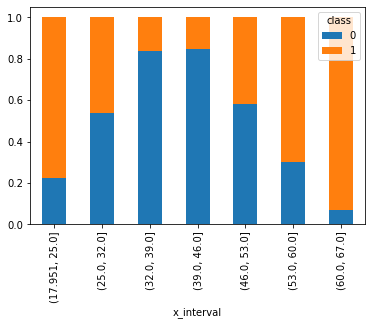

In [56]:
pd.crosstab(df['x_interval'],df['class'], normalize=0).plot(kind='bar', stacked=True)

1. Ada hubungan yg sifatnya non-linear/kuadratik 
2. Model linear saja tidak mampu menangkap pola yg ada : y = a+bx
3. Solusi yg akan digunakanadalah discretisasi. Discretisasi dapat menangkap pola antara x dan y, pola yg ditangkap tidak terbatas pola tertentu.

### Modeling tanpa Binning/Diskretisasi

In [57]:
x = df[['x']]
y = df['class']

x_train,x_test,y_train,y_test=train_test_split(
    x,
    y,
    stratify=y,
    random_state = 2020
)

In [58]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [59]:
y_pred = logreg.predict(x_test)
accuracy_score(y_test,y_pred)

0.5822454308093995

### Modeling dengan Binning/Diskretisasi

In [60]:
discretize = KBinsDiscretizer(n_bins=7, strategy='uniform',encode='onehot')
x_train_desc = discretize.fit_transform(x_train)
x_test_desc = discretize.transform(x_test)

In [61]:
x_train_desc

<1146x7 sparse matrix of type '<class 'numpy.float64'>'
	with 1146 stored elements in Compressed Sparse Row format>

In [62]:
logreg = LogisticRegression()
logreg.fit(x_train_desc,y_train)

LogisticRegression()

In [63]:
y_pred = logreg.predict(x_test_desc)
accuracy_score(y_test,y_pred)

0.6997389033942559

# 6. Generate Feature

In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [65]:
df = pd.read_csv('data/white_wine.csv')
df['label'] = np.where(df['quality']>6,1,0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0,0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0,0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0,0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0,0


In [66]:
df['alcohol'].fillna(0,inplace=True)

In [67]:
df[['alcohol','density']].isna().sum()

alcohol    0
density    0
dtype: int64

## Data splitting

In [68]:
x = df[['alcohol','density']]
y = df['label']

x_train,x_test,y_train,y_test = train_test_split(
    x,y,
    stratify=y,
    random_state=2020
)

## Model tanpa fitur Polynomial

In [69]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [70]:
y_pred = logreg.predict(x_test)
accuracy_score(y_test,y_pred)

0.8538461538461538

## Mode dengan fitur Polynomial

In [71]:
polynom = PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)
x_train_poly = polynom.fit_transform(x_train)
x_test_poly = polynom.transform(x_test)

In [72]:
pd.DataFrame(x_train_poly, columns=polynom.get_feature_names())

,x0,x1,x0^2,x0 x1,x1^2,x0^3,x0^2 x1,x0 x1^2,x1^3
0,9.1,0.9936,82.81,9.04176,0.987241,753.571,82.280016,8.983893,0.980923
1,8.7,0.9998,75.69,8.69826,0.999600,658.503,75.674862,8.696520,0.999400
2,9.7,0.9934,94.09,9.63598,0.986844,912.673,93.469006,9.572383,0.980330
3,12.6,0.9910,158.76,12.48660,0.982081,2000.376,157.331160,12.374221,0.973242
4,10.6,0.9931,112.36,10.52686,0.986248,1191.016,111.584716,10.454225,0.979443
...,...,...,...,...,...,...,...,...,...
385,9.4,0.9927,88.36,9.33138,0.985453,830.584,87.714972,9.263261,0.978259
386,10.4,0.9955,108.16,10.35320,0.991020,1124.864,107.673280,10.306611,0.986561
387,9.0,0.9949,81.00,8.95410,0.989826,729.000,80.586900,8.908434,0.984778
388,10.5,0.9974,110.25,10.47270,0.994807,1157.625,109.963350,10.445471,0.992220


In [73]:
logreg = LogisticRegression()
logreg.fit(x_train_poly, y_train)

LogisticRegression()

In [74]:
y_predict = logreg.predict(x_test_poly)
accuracy_score(y_test,y_predict)

0.9769230769230769

# Apply Several Preprocessing Method to Modelingat once Part 2 : Decision Tree

1. Data : adult:csv
2. target : income
3. Preprocess :
    - Minssing value : simple imputer with constant
    - one hot encoding : ralationship, race, sex
    - Binary encoding : workclass, marital status, occupation, native country
    - Ordinal encoding : education (already encoded)
    - No treatment : numerical
    - out : fnlwgt
4. Random state 10, data splitting 70:30 model Tree (max depth 5, criterion entropy)

In [75]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, accuracy_score

In [76]:
raw = pd.read_csv('data/adult.csv')
adult_df = raw.copy()
adult_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [77]:
adult_df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [78]:
adult_df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### 1. Input Missing Value

In [79]:
adult_df['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [80]:
adult_df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [81]:
adult_df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [82]:
adult_df['workclass'].replace('?',adult_df['workclass'].max(), inplace=True)
adult_df['occupation'].replace('?',adult_df['occupation'].max(), inplace=True)
adult_df['native.country'].replace('?',adult_df['native.country'].max(), inplace=True)
adult_df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [83]:
simple_imputer = SimpleImputer(strategy='constant',missing_values='?',fill_value='x')
adult_df[['workclass','occupation','native.country']] = simple_imputer.fit_transform(adult_df[['workclass','occupation','native.country']])
adult_df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## 2. Encoding

In [84]:
onehot = OneHotEncoder(drop='first')
binary = ce.BinaryEncoder()
# ordinal = OrdinalEncoder()

binary_encoding = Pipeline([
   ('imputer',SimpleImputer(strategy='most_frequent')),
    ('binary',ce.BinaryEncoder())
])

transformer = ColumnTransformer([
    ('onehost',onehot,['relationship', 'race', 'sex']),
    ('binary',binary_encoding,['workclass', 'marital.status', 'occupation', 'native.country'])
],remainder='passthrough')

In [85]:
# enc_df = pd.DataFrame(transformer.fit_transform(adult_df))
# enc_df.columns = transformer.get_feature_names()
# enc_df.drop(labels= 'education',axis=1, inplace = True)
# enc_df

In [86]:
x = adult_df.drop(columns=['fnlwgt','income','education'])
y = adult_df['income']

x_train,x_test,y_train,y_test = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=10
)
x_test

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
11358,22,Private,10,Never-married,Tech-support,Own-child,White,Male,0,0,40,United-States
10859,44,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,35,United-States
30948,27,Local-gov,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
29811,54,Private,9,Never-married,Other-service,Not-in-family,White,Male,0,0,15,United-States
18408,56,Private,8,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
29003,35,Private,10,Never-married,Other-service,Not-in-family,White,Female,0,0,65,United-States
9973,19,Private,9,Never-married,Other-service,Not-in-family,White,Female,0,0,50,United-States
2986,66,Self-emp-inc,13,Married-civ-spouse,Sales,Husband,White,Male,5556,0,26,United-States
2366,31,Local-gov,13,Never-married,Craft-repair,Not-in-family,White,Male,8614,0,40,United-States


In [87]:
x_train_predict = transformer.fit_transform(x_train)
x_test_predict = transformer.transform(x_test)
x_train_predict.shape

C:\Users\62812\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


(22792, 35)

In [88]:
col_name = list(transformer.transformers_[0][1].get_feature_names()) + list(transformer.transformers_[1][1]['binary'].get_feature_names()) + list(['age','education.num','capital.gain','capital.loss','hours.per.week'])
len(col_name)
col_name

['x0_Not-in-family',
 'x0_Other-relative',
 'x0_Own-child',
 'x0_Unmarried',
 'x0_Wife',
 'x1_Asian-Pac-Islander',
 'x1_Black',
 'x1_Other',
 'x1_White',
 'x2_Male',
 '0_0',
 '0_1',
 '0_2',
 '0_3',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 '2_0',
 '2_1',
 '2_2',
 '2_3',
 '2_4',
 '3_0',
 '3_1',
 '3_2',
 '3_3',
 '3_4',
 '3_5',
 '3_6',
 'age',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [89]:
x_train_predict = pd.DataFrame(x_train_predict)
x_test_predict = pd.DataFrame(x_test_predict)
x_train_predict.columns = col_name
x_test_predict.columns = col_name

In [90]:
model = DecisionTreeClassifier(max_depth=5, criterion='entropy')
model.fit(x_train_predict, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [91]:
y_predict = model.predict(x_test_predict)
accuracy_score(y_test,y_predict)

0.8401064592076978

## Model Properties

In [92]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.00168202, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.42723485, 0.        , 0.01811199, 0.        , 0.00058799,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03483909, 0.23270828, 0.22514898, 0.02375821, 0.03592859])

In [93]:
df_importance = pd.DataFrame({
   'importance': model.feature_importances_
}, index=col_name).sort_values('importance', ascending=False)
df_importance

,importance
1_1,0.427235
education.num,0.232708
capital.gain,0.225149
hours.per.week,0.035929
age,0.034839
capital.loss,0.023758
1_3,0.018112
x0_Unmarried,0.001682
2_1,0.000588
x1_Other,0.000000


<AxesSubplot:>

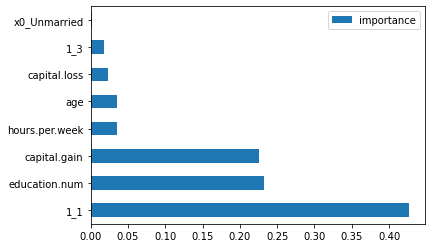

In [94]:
df_importance[:8].plot(kind='barh')

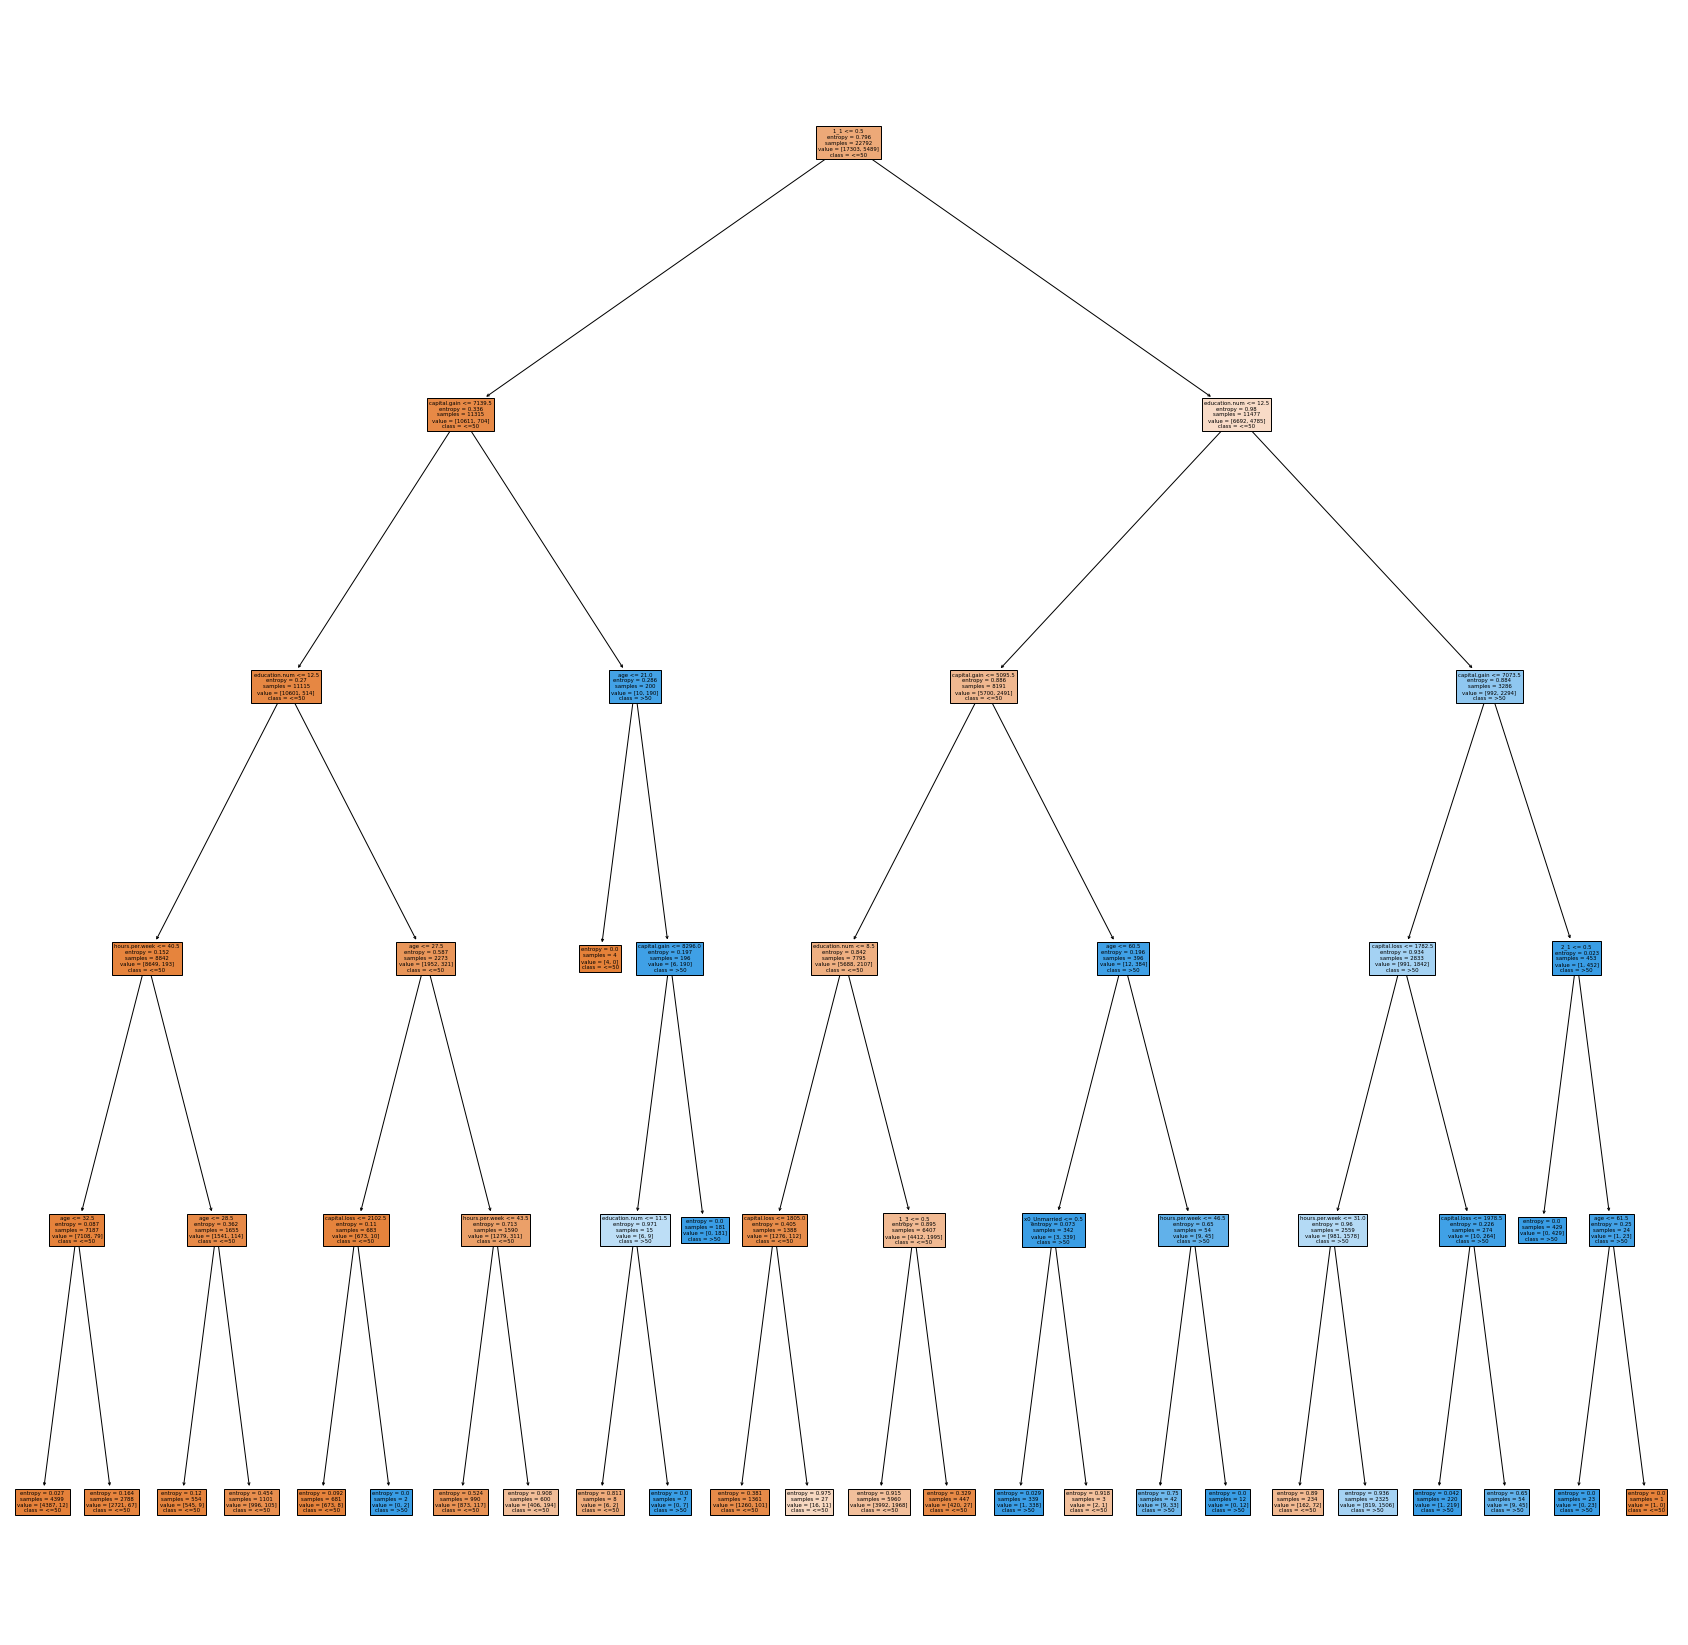

In [95]:
plt.figure(figsize=(30,30))
plot_tree(model, feature_names=col_name, class_names=['<=50','>50'],filled=True)
plt.show()

## Apply Several Preprocessing Method to Modeling at Once Part 3 : Logistic Regression

1. data : adult.csv
2. target : income
3. preprocessing:
    - missing value : simple imputer with constant
    - one hot encoding : relationship, race, sex
    - binary encoding : workclass, marital status, occupation, native country
    - ordinal encoding : education (already encoded)
    - not reatment : numerical
    - out : fnlwgt
4. feature selection : select percentile
5. model : logistic regression (max iter 1000, solver liblinear, C10)

In [96]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score 

In [97]:
raw = pd.read_csv('data/adult.csv')
adult_df = raw.copy()
adult_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [98]:
adult_df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

### 1. Missing Value

In [99]:
imputer = SimpleImputer(strategy='constant', missing_values='?', fill_value='x')
adult_df[['workclass','occupation','native.country']] = pd.DataFrame(imputer.fit_transform(adult_df[['workclass','occupation','native.country']]))
adult_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,x,77053,HS-grad,9,Widowed,x,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,x,186061,Some-college,10,Widowed,x,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [100]:
adult_df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### 2. Encoding

In [101]:
onehot = OneHotEncoder(drop='first')

binary_imputer = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('binary',ce.BinaryEncoder())
])

transformer = ColumnTransformer([
    ('onehot',onehot, ['relationship', 'race', 'sex']),
    ('binary',binary_imputer,['workclass', 'marital.status', 'occupation', 'native.country'])
], remainder = 'passthrough')



In [102]:
x = adult_df.drop(columns=['fnlwgt','income','education'])
y = adult_df['income']

x_train,x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.3,
    random_state=10
)
x_test

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
11358,22,Private,10,Never-married,Tech-support,Own-child,White,Male,0,0,40,United-States
10859,44,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,35,United-States
30948,27,Local-gov,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
29811,54,Private,9,Never-married,Other-service,Not-in-family,White,Male,0,0,15,United-States
18408,56,Private,8,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
29003,35,Private,10,Never-married,Other-service,Not-in-family,White,Female,0,0,65,United-States
9973,19,Private,9,Never-married,Other-service,Not-in-family,White,Female,0,0,50,United-States
2986,66,Self-emp-inc,13,Married-civ-spouse,Sales,Husband,White,Male,5556,0,26,United-States
2366,31,Local-gov,13,Never-married,Craft-repair,Not-in-family,White,Male,8614,0,40,United-States


In [103]:
x_train_prep = transformer.fit_transform(x_train)
x_test_prep = transformer.transform(x_test)

C:\Users\62812\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [104]:
x_train_prep.shape

(22792, 36)

In [105]:
select = SelectPercentile(percentile=50)
select.fit(x_train_prep,y_train)

x_train_selected = select.transform(x_train_prep)
x_test_selected = select.transform(x_test_prep)

C:\Users\62812\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [10 15 19 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\62812\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [106]:
x_train_selected.shape

(22792, 18)

### 3. Feature Selection

In [107]:
col_name = list(transformer.transformers_[0][1].get_feature_names()) + list(transformer.transformers_[1][1]['binary'].get_feature_names()) + list(['age','education.num','capital.gain','capital.loss','hours.per.week'])
len(col_name)

36

In [108]:
select.get_support()

array([ True, False,  True,  True,  True, False,  True, False,  True,
        True, False, False,  True,  True, False, False,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True])

In [109]:
df_select = pd.DataFrame({
    'features': col_name,
    'select' : select.get_support()
})
df_select[df_select['select']==True]

,features,select
0,x0_Not-in-family,True
2,x0_Own-child,True
3,x0_Unmarried,True
4,x0_Wife,True
6,x1_Black,True
8,x1_White,True
9,x2_Male,True
12,0_2,True
13,0_3,True
16,1_1,True


### Modeling

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
logrex = LogisticRegression(C=10,max_iter=1000,solver='liblinear')
logrex.fit(x_train_selected, y_train)

LogisticRegression(C=10, max_iter=1000, solver='liblinear')

In [112]:
y_pred = logrex.predict(x_test_selected)
accuracy_score(y_pred, y_test)

0.8425632101545706

### Model nya

In [113]:
logrex.coef_[0]

array([-5.84657720e-01, -1.75643220e+00, -1.04099507e+00,  1.12822723e+00,
       -2.65321556e-01,  6.82112097e-02,  6.95292798e-01,  4.02165491e-01,
        2.81515936e-01, -4.86195734e-01, -1.02720791e+00, -1.23812527e+00,
       -2.56909905e-01,  1.69138698e-02,  3.07836898e-01,  3.15416253e-04,
        6.06967240e-04,  2.64186052e-02])

In [114]:
coef_table = pd.DataFrame({
    'coef':logrex.coef_[0]
}, index=df_select[df_select['select']==True]['features'].values)

In [115]:
coef_table

,coef
x0_Not-in-family,-0.584658
x0_Own-child,-1.756432
x0_Unmarried,-1.040995
x0_Wife,1.128227
x1_Black,-0.265322
x1_White,0.068211
x2_Male,0.695293
0_2,0.402165
0_3,0.281516
1_1,-0.486196
